## IMPORTING DEPENDENCIES

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics 

## DATA COLLECTING AND PROCESSING

In [2]:
dataset = pd.read_csv('car data.csv')
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
dataset.shape

(301, 9)

In [6]:
dataset.info() ##to check of missing cells

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
#number of missing values
dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
#checking distribution of categorical data
print(dataset.Fuel_Type.value_counts())
print(dataset.Seller_Type.value_counts())
print(dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [11]:
#encoding categorical data
dataset.replace({'Fuel_Type' : {'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace = True)
dataset.replace({'Seller_Type' : {'Dealer':0, 'Individual':1}}, inplace = True)
dataset.replace({'Transmission' : {'Manual':0, 'Automatic':1}}, inplace = True)

In [12]:
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


## SPLITTING DATA INTO TRAINING AND TESTING DATA

In [13]:
dataset = dataset.drop(['Car_Name'],axis=1) #dropped because i dont need names of cars no relation to actual data
X = dataset.drop(['Selling_Price'], axis=1) #dropped because this is the answer
Y = dataset['Selling_Price'] #answers here

In [14]:
print(X)
print(Y)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [15]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=5)

## MODEL TRAINING


In [16]:
#loading the model
lin_reg_model = LinearRegression()

In [17]:
lin_reg_model.fit(x_train, y_train)

LinearRegression()

## MODEL EVALUATION

In [18]:
#prediction
training_predict = lin_reg_model.predict(x_train)

In [23]:
#R squared error
error_score = metrics.r2_score(y_train, training_predict)
print("R squared error = ", error_score)
## R squared error for regression
## accuracy score for classification

R squared error =  0.8741578019489059


## VISUALIZING ACTUAL AND PREDICTED PRICES

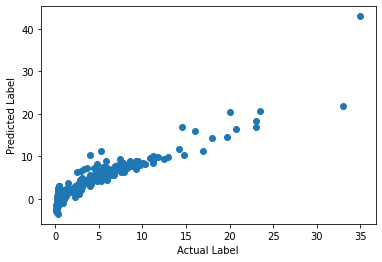

In [24]:
plt.scatter(y_train, training_predict)
plt.xlabel("Actual Label")
plt.ylabel("Predicted Label")
plt.show()

In [26]:
test_predict = lin_reg_model.predict(x_test)
error_score = metrics.r2_score(y_test, test_predict)
print("R squared error = ", error_score)

R squared error =  0.9027562364111299


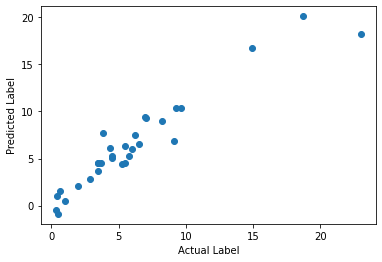

In [27]:
plt.scatter(y_test, test_predict)
plt.xlabel("Actual Label")
plt.ylabel("Predicted Label")
plt.show()

## LASSO REGRESSION MODEL

In [28]:
#loading the model
las_reg_model = Lasso()

In [29]:
las_reg_model.fit(x_train, y_train)

Lasso()

## MODEL EVALUATION

In [30]:
#prediction
training_predict = las_reg_model.predict(x_train)

In [31]:
#R squared error
error_score = metrics.r2_score(y_train, training_predict)
print("R squared error = ", error_score)
## R squared error for regression
## accuracy score for classification

R squared error =  0.8392110291126876


## VISUALIZING ACTUAL AND PREDICTED PRICES

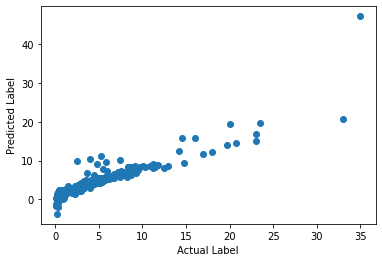

In [32]:
plt.scatter(y_train, training_predict)
plt.xlabel("Actual Label")
plt.ylabel("Predicted Label")
plt.show()

In [33]:
test_predict = las_reg_model.predict(x_test)
error_score = metrics.r2_score(y_test, test_predict)
print("R squared error = ", error_score)

R squared error =  0.8632359515872632


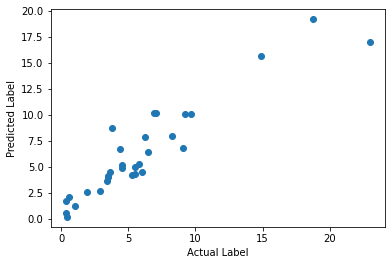

In [34]:
plt.scatter(y_test, test_predict)
plt.xlabel("Actual Label")
plt.ylabel("Predicted Label")
plt.show()